In [42]:
import ast , numpy as np
with open('train_data.txt') as f:
    train_data = np.array(ast.literal_eval(f.read())).astype('float32')

with open('train_labels.txt') as f:
    train_labels = np.array(ast.literal_eval(f.read())).astype('int')

       
with open('test_data.txt') as f:
    test_data = np.array(ast.literal_eval(f.read())).astype('float32')    

(28, 28, 1)


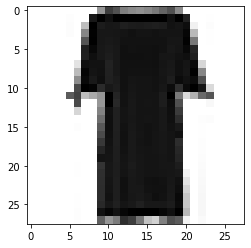

In [3]:
print(train_data[0,:,:,:].shape)
import matplotlib.pyplot as plt
plt.imshow(train_data[2, :, :, :].reshape(28, 28), cmap='gray_r')
plt.show()

In [4]:
# 檢查數據狀況
train_data.shape, train_labels.shape, train_labels[:1]

((50, 28, 28, 1), (50, 3), array([[0, 1, 0]]))

In [ ]:
# 建立model 
# the Sequential model
# the Model class used with the functional API.

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten

# the Sequential model type I
model = Sequential()

model.add( Conv2D(filters= 5, kernel_size=(2,2), 
                  strides=(1, 1), 
                  padding='same', 
                  #dilation_rate=2 , 
                  input_shape=(28, 28, 1)
                 ) 
         )
model.add( Activation('relu')  )


model.add( Conv2D(filters= 5, kernel_size=(2,2), 
                  strides=(1, 1), 
                  padding='same', 
                  #dilation_rate=2 , 
                 ) 
         )
model.add( Activation('relu')  )

model.add( Conv2D(filters= 5, kernel_size=(2,2), 
                  strides=(1, 1), 
                  padding='same', 
                  #dilation_rate=2 , 
                 ) 
         )
model.add( Activation('relu')  )

model.add(Flatten())
model.add( Dense(32) )
model.add( Activation('relu')  )
model.add( Dense(3)  )
model.add( Activation('softmax')  ) 

model.summary()


Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 5)         25        
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 5)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 5)         105       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 5)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 5)         105       
_________________________________________________________________
activation_3 (Activation)    (None, 28, 28, 5)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3920)             

In [6]:
# the Sequential model type II
model = Sequential()
model.add( Conv2D(filters= 5, kernel_size=(2,2), activation='relu', padding='same', input_shape=(28, 28, 1)) )
model.add( Conv2D(filters= 5, kernel_size=(2,2), activation='relu', padding='same') )
model.add( Conv2D(filters= 5, kernel_size=(2,2), activation='relu', padding='same') )
model.add( Flatten())

model.add( Dense(32, activation='relu', input_dim=784) )
model.add( Dense(3, activation='softmax') )
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 5)         25        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 5)         105       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 5)         105       
_________________________________________________________________
flatten_2 (Flatten)          (None, 3920)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                125472    
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 99        
Total params: 125,806
Trainable params: 125,806
Non-trainable params: 0
________________________________________________

In [7]:
# the Sequential model type III
model = Sequential([
                    Conv2D(filters= 5, kernel_size=(2,2), padding='same', input_shape=(28, 28, 1)), 
    
                    Activation('relu'),
    
                    Conv2D(filters= 5, kernel_size=(2,2), padding='same'), 
    
                    Activation('relu'),
    
                    Conv2D(filters= 5, kernel_size=(2,2), padding='same'), 
    
                    Activation('relu'),
    
                    Flatten(),
    
                    Dense(32), 
                    Activation('relu'),
    
                    Dense(3),  
                    Activation('softmax'),
                   ])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 5)         25        
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 5)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 5)         105       
_________________________________________________________________
activation_7 (Activation)    (None, 28, 28, 5)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 5)         105       
_________________________________________________________________
activation_8 (Activation)    (None, 28, 28, 5)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3920)             

In [8]:
# the Model class used with the functional API.
from keras.models import Model
from keras.layers import Input, Dense , ReLU, Softmax, Conv2D, Flatten

a = Input(shape=(28, 28, 1))

dense = Conv2D(filters= 5, kernel_size=(2,2), padding='same')(a)
dense = ReLU()(dense)

dense = Conv2D(filters= 5, kernel_size=(2,2), padding='same')(dense)
dense = ReLU()(dense)

dense = Conv2D(filters= 5, kernel_size=(2,2), padding='same')(dense)
dense = ReLU()(dense)

dense = Flatten()(dense)

dense = Dense(32)(dense)
dense = ReLU()(dense)

dense = Dense(3)(dense)
b     = Softmax()(dense)


model = Model(inputs=a, outputs=b)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 5)         25        
_________________________________________________________________
re_lu_1 (ReLU)               (None, 28, 28, 5)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 5)         105       
_________________________________________________________________
re_lu_2 (ReLU)               (None, 28, 28, 5)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 5)         105       
_________________________________________________________________
re_lu_3 (ReLU)               (None, 28, 28, 5)         0   

In [11]:
# 編譯
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# <keras.callbacks.callbacks.History at 0x1b93db60748>
history = model.fit(train_data, train_labels, batch_size=10, epochs=10, verbose=1)

Epoch 1/10
50/50 [==============================] - 0s 6ms/step - loss: 0.0869 - accuracy: 0.9600
Epoch 2/10
50/50 [==============================] - 0s 2ms/step - loss: 0.0109 - accuracy: 1.0000
Epoch 3/10
50/50 [==============================] - 0s 2ms/step - loss: 0.0337 - accuracy: 0.9800
Epoch 4/10
50/50 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 1.0000
Epoch 5/10
50/50 [==============================] - 0s 1ms/step - loss: 0.0103 - accuracy: 1.0000
Epoch 6/10
50/50 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 7/10
50/50 [==============================] - 0s 1ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 8/10
50/50 [==============================] - 0s 1ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 9/10
50/50 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 10/10
50/50 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 1.0000


In [12]:
# <keras.callbacks.callbacks.History at 0x1b93db60748>
# history
history.history.get('loss'), history.history.get('accuracy')

([0.08694589929655194,
  0.010886447779193986,
  0.033685476332902906,
  0.016074309963732956,
  0.010306467046029865,
  0.002908452518749982,
  0.004237410469795577,
  0.005146486766170711,
  0.0030703784635988996,
  0.0025488013634458184],
 [0.96, 1.0, 0.98, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

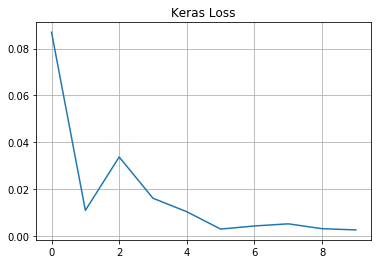

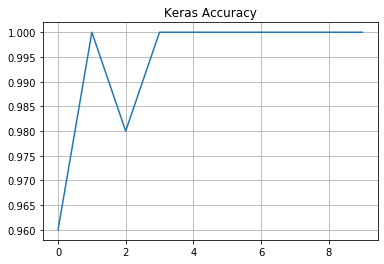

In [13]:
import matplotlib.pyplot as plt
plt.title('Keras Loss')
plt.plot(history.history.get('loss'))
plt.grid()
plt.show()

import matplotlib.pyplot as plt
plt.title('Keras Accuracy')
plt.plot(history.history.get('accuracy'))
plt.grid()
plt.show()

In [14]:
model.evaluate(train_data, train_labels)[1] * 100.0

50/50 [==============================] - 0s 8ms/step


100.0

In [ ]:
# 

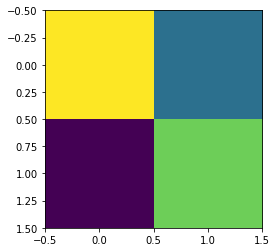

In [32]:
#                                2  2  1  5
model.layers[1].get_weights()[0][:, :, 0, 0]
import matplotlib.pyplot as plt
plt.imshow(model.layers[1].get_weights()[0][:, :, 0, 4])
plt.show()

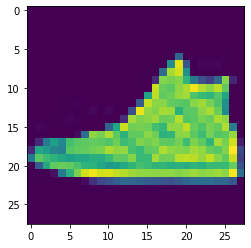

In [45]:

plt.imshow(test_data[3, :, :, :].reshape(28,28))
plt.show()



In [47]:
def conv_kernel(kernel, img):
    height, width = img.shape[0]//kernel.shape[0], img.shape[1]//kernel.shape[1]
    conv = np.zeros((height, width))
    for ii in range(height):
        for jj in range(width):
            val = np.sum(kernel * img[ii*kernel.shape[0]:ii*kernel.shape[0]+kernel.shape[0], 
                                      jj*kernel.shape[1]:jj*kernel.shape[1]+kernel.shape[1]])
            conv[ii, jj] = val
    
    return(conv)

In [64]:
import numpy as np
def convolution(image, kernel):
    kernel = kernel - np.mean(kernel)
    result = np.zeros(image.shape)

    for ii in range(image.shape[0]-2):
        for jj in range(image.shape[1]-2):
            result[ii, jj] = np.sum(image[ii:ii+2, jj:jj+2] * kernel)

    return result

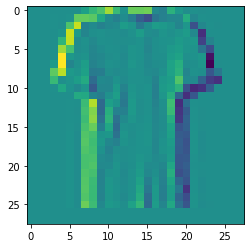

In [67]:

plt.imshow(convolution(kernel=model.layers[1].get_weights()[0][:, :, 0, 1], 
                       image=test_data[4, :, :, :].reshape(28,28)) )
plt.show()

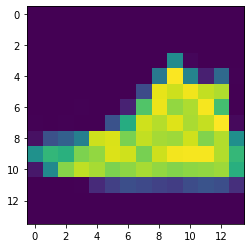

In [53]:

plt.imshow(conv_kernel(kernel=model.layers[1].get_weights()[0][:, :, 0, 4], 
                      img=test_data[3, :, :, :].reshape(28,28)) )
plt.show()

In [ ]:
# filters 來產生新圖像
weights = []
for i, m in enumerate(model.layers):
    if type(m) == Conv2D :
        weights.append( m.get_weights() )
        print('filters ', i, m.filters)
len(weights)
# 表示有兩段 CONV2D

In [ ]:
weights[0][0].shape

In [ ]:
# 十張  CNN 圖片           # 0 ... 9
for w in weights:
    print(w[0][:, :, 0  , 4])

In [ ]:
def conv_kernel(kernel, img):
    height, width = img.shape[0]//kernel.shape[0], img.shape[1]//kernel.shape[1]
    conv = np.zeros((height, width))
    for ii in range(height):
        for jj in range(width):
            val = np.sum(kernel * img[ii*kernel.shape[0]:ii*kernel.shape[0]+kernel.shape[0], 
                                      jj*kernel.shape[1]:jj*kernel.shape[1]+kernel.shape[1]])
            conv[ii, jj] = val
    
    return(conv)

In [ ]:
# 原始圖片
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow( train_data[4, :, :, :].reshape(28, 28) , cmap='gray' )
plt.show()

In [ ]:
#                     filter = 0

clothes = 4

import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow( train_data[clothes, :, :, :].reshape(28, 28) , cmap='gray' )
plt.title('Original ')
plt.axis('off')
plt.show()
for i, w in enumerate(weights):
    print('Con2D Layer', str(i))
    for j in range(5): # 唯一沒有修改 **********
        kernel = w[0][:, :, 0  , j]
        img = train_data[clothes, :, :, :].reshape(28, 28)  # 針對指定影像處理
        img_filter = conv_kernel( kernel,  img)
        plt.figure(figsize=(2,2))
        plt.imshow( img_filter, cmap='gray' )
        plt.title('Conv '+ str(j))
        plt.axis('off')
        plt.show()
    print('-'*50)